#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

 # 1.Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [ ]:
df.shape #number of rows is 125351 with 13 columns each

(148654, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
df.dtypes.value_counts()

float64    8
object     3
int64      2
dtype: int64

looking at the data set we have 3 object type in the data frame , 1 int64 and 8 float 64  

# 2. Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [ ]:
#calculating the total pay with benifits can be done easily by calling this method
df['TotalPayBenefits'].describe()

count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

In [ ]:
#lets not forget about the mode
df['TotalPayBenefits'].mode()

0    7959.18
Name: TotalPayBenefits, dtype: float64

as u can see we have a mean of 93692 , std of 62793 and minimum salary of -618 ,maximum of 567595,median of 92404 and mode of  7959

In [ ]:
# or we can get it the hard way
mean=df['TotalPayBenefits'].mean()
max=df['TotalPayBenefits'].max()
min=df['TotalPayBenefits'].min()
mode=df['TotalPayBenefits'].mode()
std=df['TotalPayBenefits'].std()
median=df['TotalPayBenefits'].median()
print(mean , max , min , mode , median , std)

93692.55481056681 567595.43 -618.13 0    7959.18
Name: TotalPayBenefits, dtype: float64 92404.09 62793.533483237705




# 3. **Handle missing data by suitable method with explain why you use it.**

looking at notes and status the are all empty so i decided to drop them

In [ ]:
df.drop(['Notes','Status'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


lets see the statistics of the whole dataset

In [ ]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


the means are not so different from median so we can fill the data set with the mean of each column but after studying the df we can impute 25% of the null values of benifits by subtracting the values of total pay from total pay from benifits

In [ ]:
df['Benefits']=df['TotalPayBenefits']-df['TotalPay']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


now notice that we didnt lose much data and imputed alot of the logically , looking at the rest of the null lets look at the other pay and over time pay null values rows


In [ ]:
df_null=df[df[['OvertimePay','OtherPay']].isnull().any(axis=1)]
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 148646 to 148652
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                4 non-null      int64  
 1   EmployeeName      4 non-null      object 
 2   JobTitle          4 non-null      object 
 3   BasePay           0 non-null      float64
 4   OvertimePay       0 non-null      float64
 5   OtherPay          0 non-null      float64
 6   Benefits          4 non-null      float64
 7   TotalPay          4 non-null      float64
 8   TotalPayBenefits  4 non-null      float64
 9   Year              4 non-null      int64  
 10  Agency            4 non-null      object 
dtypes: float64(6), int64(2), object(3)
memory usage: 384.0+ bytes


In [ ]:
df_null.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,San Francisco


we  get that these samples provide zero info so we decide to drop them

In [ ]:
df.dropna(subset=['OvertimePay','OtherPay'],axis=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148650 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


looking at the data of base pay we can get it by subtracting over time and other pay from total pay

In [ ]:
df['BasePay']=df['TotalPay']-(df['OtherPay']+df['OvertimePay'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148650 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148650 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [ ]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


In [ ]:
df['Year'].value_counts()


2014    38119
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

now we got a nice homgenous data imputed well and with logic

# 4. Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

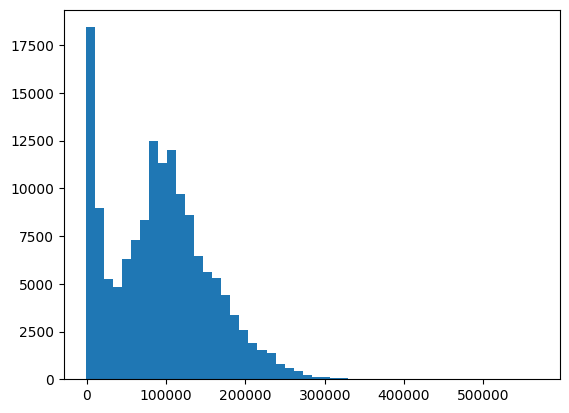

In [ ]:
#creating histograms for saleries
plt.hist(df['TotalPayBenefits'],bins=50);


looking at the salaries histograms it seems odd to see that a company pays some one zero or with negative amount of money so i decided to drop them to be more effecient data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148650 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148650 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [ ]:
df_filterd=df[df['TotalPayBenefits']>0]

In [ ]:
df_filterd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148620 entries, 0 to 148625
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148620 non-null  int64  
 1   EmployeeName      148620 non-null  object 
 2   JobTitle          148620 non-null  object 
 3   BasePay           148620 non-null  float64
 4   OvertimePay       148620 non-null  float64
 5   OtherPay          148620 non-null  float64
 6   Benefits          148620 non-null  float64
 7   TotalPay          148620 non-null  float64
 8   TotalPayBenefits  148620 non-null  float64
 9   Year              148620 non-null  int64  
 10  Agency            148620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


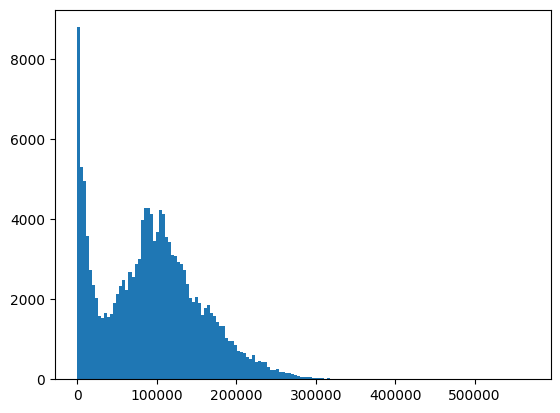

In [ ]:
plt.hist(df_filterd['TotalPayBenefits'],bins=150);

seems kinda better

In [ ]:
df_filterd['TotalPayBenefits'].describe()

count    148620.000000
mean      93713.993445
std       62784.714471
min           0.300000
25%       44132.715000
50%       92419.380000
75%      132887.897500
max      567595.430000
Name: TotalPayBenefits, dtype: float64

as we can see its too hard to do a pie chart that would be informative for the user so i decided to make a pie chart of each 100 value to the the distribution among them and try to make informative as i could


In [ ]:
df_filterd['JobTitle']=df_filterd['JobTitle'].str.lower()

<ipython-input-357-561ab81bdacc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterd['JobTitle']=df_filterd['JobTitle'].str.lower()


In [ ]:
pd.set_option('display.max_rows',10)
df_filterd['JobTitle'].value_counts()

transit operator                                      9423
special nurse                                         5791
registered nurse                                      4955
custodian                                             3211
firefighter                                           3153
                                                      ... 
track maintenance superintendent,municipal railway       1
senior supervising probation officer, juvenile pou       1
principal recreation supervisor                          1
veterniary laboratory technologist                       1
cashier 3                                                1
Name: JobTitle, Length: 1636, dtype: int64

as we can see there is about 1636 job role in this company
which is too long for pie charts so i decided to do a a new feature joining each dep as i am not informed with how  many deparments are there and what each role belong to


In [ ]:
df_filterd.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


In [ ]:
def determine_department(job_title):
    if 'fire department' in job_title:
        return 'fire'
    elif 'police department' in job_title:
        return 'police'
    elif 'health' in job_title:
        return 'health'
    elif 'attorney' in job_title :
        return 'legal'
    elif 'building' in job_title:
        return 'building'
    else:
        return 'Other'

#here i decided to include the most variety of the dept to show the proportion in it

In [ ]:
# Apply the function to create a new column
df_filterd['Department'] = df_filterd['JobTitle'].apply(determine_department)

<ipython-input-361-3aed6283251d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filterd['Department'] = df_filterd['JobTitle'].apply(determine_department)


In [ ]:
df_filterd.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Department
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,Other
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,police
2,3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,police
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,Other
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,fire


In [ ]:
#now into plotting 5 pie plots represnting 5 dept with the proportion in it
#fire dep
fire_filterd=df_filterd[df_filterd['Department']=='fire']


In [ ]:
fire_counts=fire_filterd['JobTitle'].value_counts()

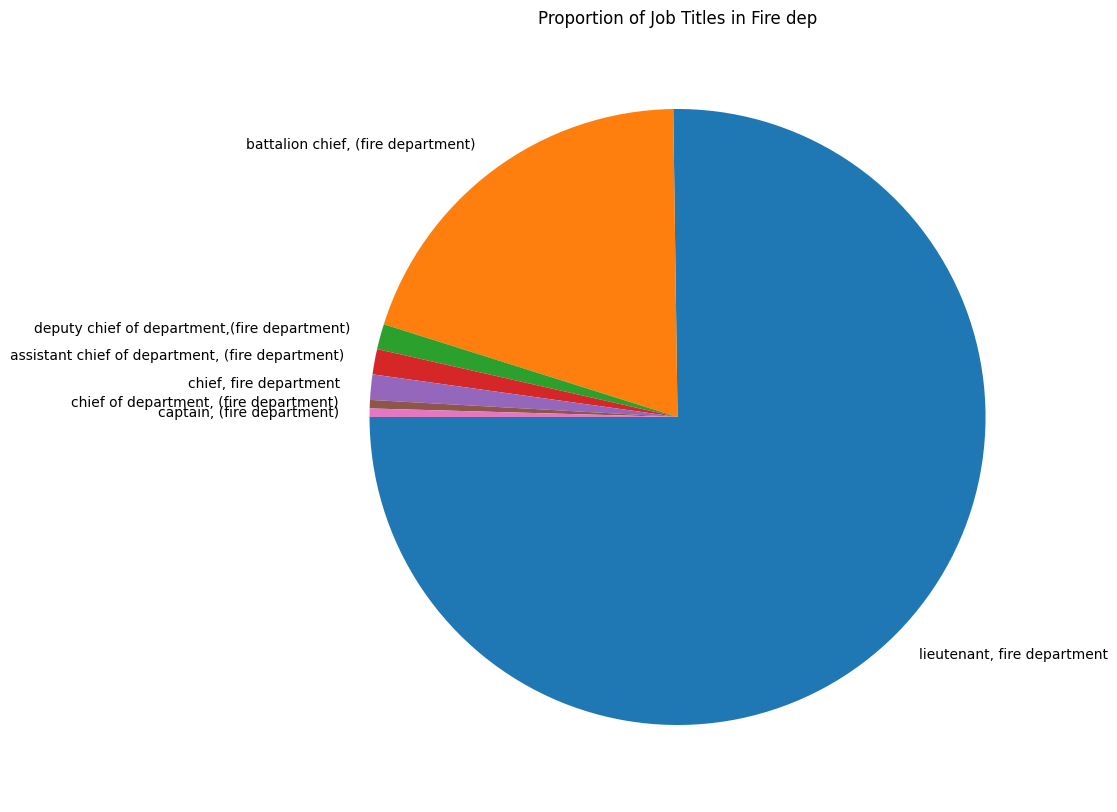

In [ ]:
plt.figure(figsize=(12, 10))
plt.pie(fire_counts, labels=fire_counts.index, startangle=180)
plt.title('Proportion of Job Titles in Fire dep')
plt.show()

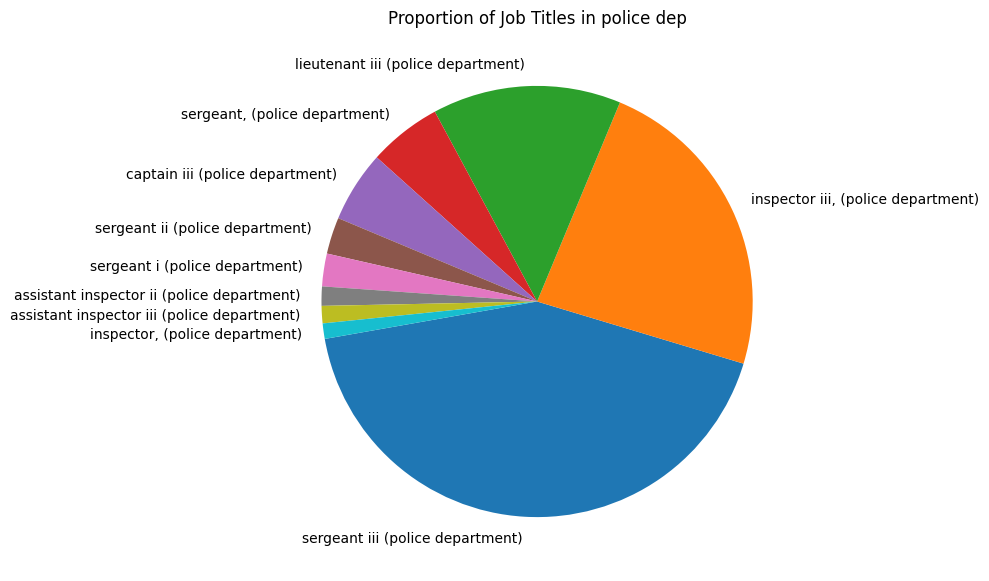

In [ ]:
police_filterd=df_filterd[df_filterd['Department']=='police']
police_counts=police_filterd['JobTitle'].value_counts()
plt.figure(figsize=(12, 7))
plt.pie(police_counts.head(10), labels=police_counts.head(10).index, startangle=190)
plt.title('Proportion of Job Titles in police dep')
plt.show()

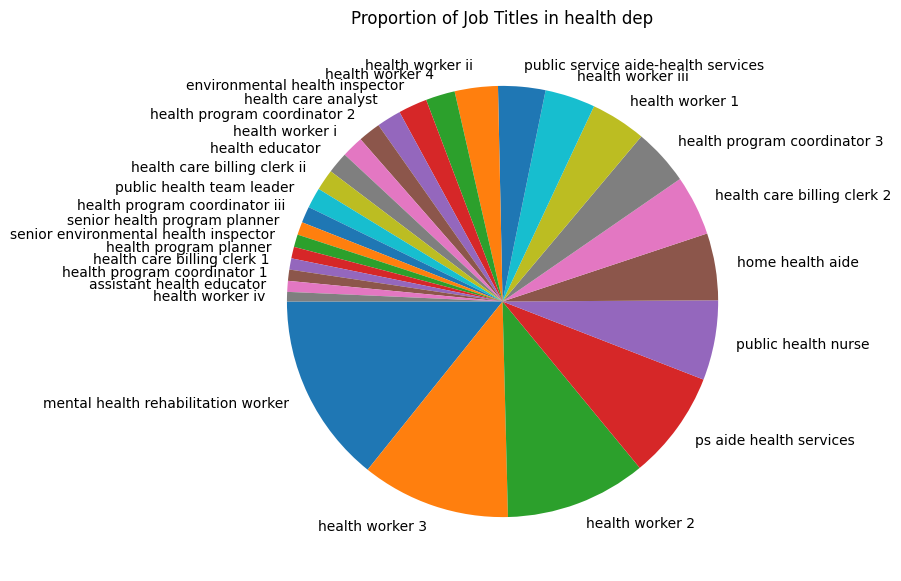

In [ ]:
health_filterd=df_filterd[df_filterd['Department']=='health']
health_counts=health_filterd['JobTitle'].value_counts()
plt.figure(figsize=(12, 7))
plt.pie(health_counts.head(28), labels=health_counts.head(28).index, startangle=180)
plt.title('Proportion of Job Titles in health dep')
plt.show()

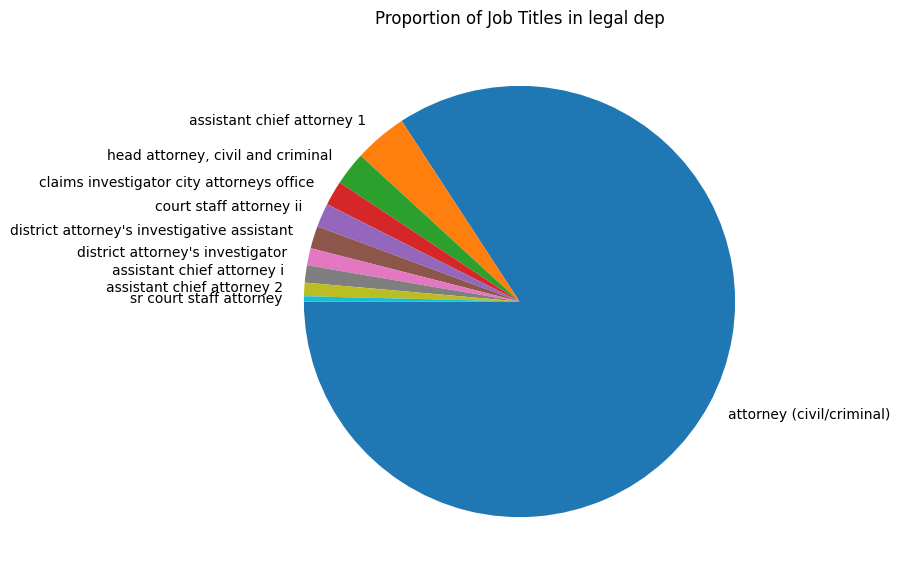

In [ ]:
legal_filterd=df_filterd[df_filterd['Department']=='legal']
legal_counts=legal_filterd['JobTitle'].value_counts()
plt.figure(figsize=(12, 7))
plt.pie(legal_counts.head(10), labels=legal_counts.head(10).index, startangle=180)
plt.title('Proportion of Job Titles in legal dep')
plt.show()

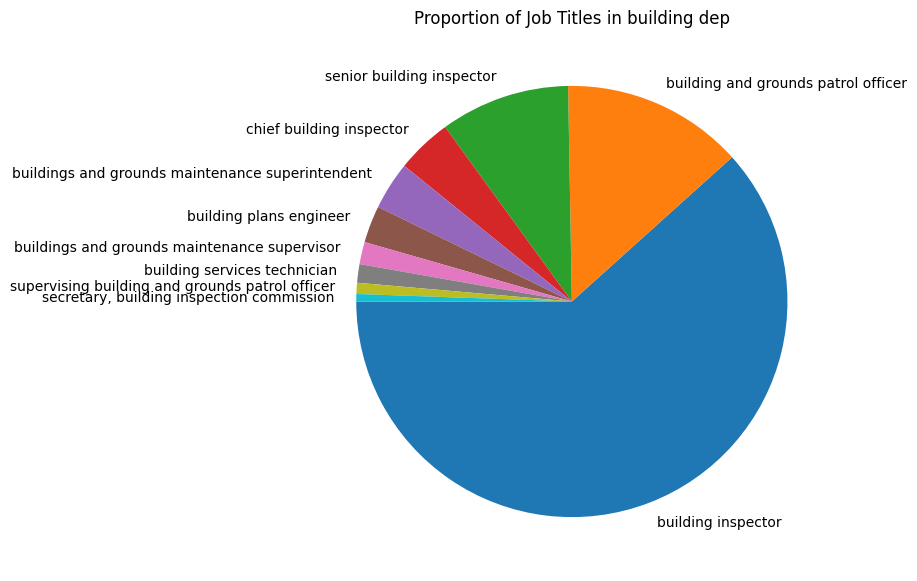

In [ ]:
building_filterd=df_filterd[df_filterd['Department']=='building']
building_counts=building_filterd['JobTitle'].value_counts()
plt.figure(figsize=(12, 7))
plt.pie(building_counts.head(10), labels=building_counts.head(10).index, startangle=180)
plt.title('Proportion of Job Titles in building dep')
plt.show()

# 5. Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [ ]:
# lets see avg of salaries across each dept we made to visulise
fire_filterd['TotalPayBenefits'].describe()

count       226.000000
mean     179946.352301
std       50268.758284
min        7093.370000
25%      148055.222500
50%      169100.100000
75%      197121.247500
max      422353.400000
Name: TotalPayBenefits, dtype: float64

In [ ]:
health_filterd['TotalPayBenefits'].describe()

count      4034.000000
mean      68552.148059
std       42687.004965
min          10.670000
25%       37636.732500
50%       70658.200000
75%       93798.395000
max      327201.580000
Name: TotalPayBenefits, dtype: float64

In [ ]:
police_filterd['TotalPayBenefits'].describe()

count       712.000000
mean     160638.450815
std       33153.221299
min         283.860000
25%      142899.622500
50%      153160.715000
75%      174573.900000
max      538909.280000
Name: TotalPayBenefits, dtype: float64

In [ ]:
building_filterd['TotalPayBenefits'].describe()

count       360.000000
mean     117134.475722
std       47053.702882
min          76.260000
25%       93405.752500
50%      131154.150000
75%      151924.862500
max      189229.820000
Name: TotalPayBenefits, dtype: float64

In [ ]:
legal_filterd['TotalPayBenefits'].describe()

count      1841.000000
mean     164684.552347
std       64943.666251
min          13.480000
25%      124569.160000
50%      167661.710000
75%      222623.620000
max      314612.090000
Name: TotalPayBenefits, dtype: float64

it seems that the avg salary of a fire dept is more than the others

# 6.Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [ ]:
corr_matrix = df_filterd.corr(numeric_only=True)
corr_matrix["TotalPayBenefits"].sort_values(ascending=False)

TotalPayBenefits    1.000000
TotalPay            0.977301
BasePay             0.946836
Benefits            0.781895
OvertimePay         0.467963
OtherPay            0.422307
Year                0.152358
Id                 -0.091755
Name: TotalPayBenefits, dtype: float64

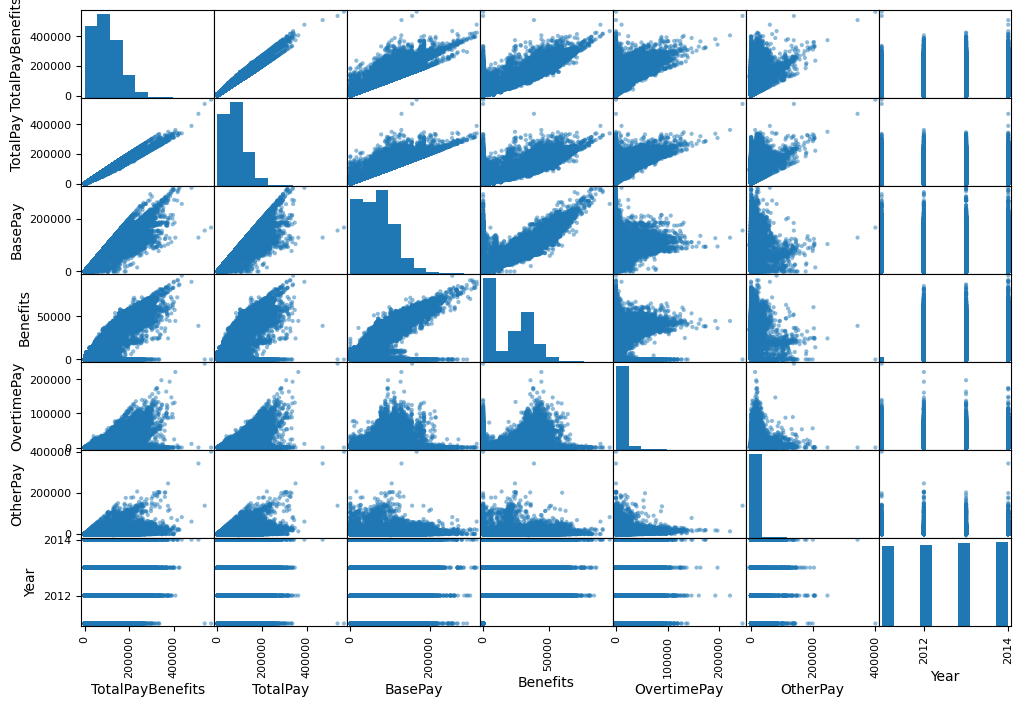

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["TotalPayBenefits", "TotalPay", "BasePay",
              "Benefits",'OvertimePay','OtherPay','Year']
scatter_matrix(df_filterd[attributes], figsize=(12, 8));

# 7. Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

**summery of the data it contains alot of noise and not organized but looking at the salaries they are  not normaly
ditributed across the dataset it have 2 modes and the avg of a fire dept employee is larger than alot of employees but we can't
say for sure that its all of the data as its roles weren explictly explained so its just an assumption
also benifits and base pay have a great corr with the whole salary may help us with predicting how much is the total salary with the benefits included**

# Good Luck!